STEP 1 : Loading the Data & creating DataFrame

In [1]:
import pandas as pd
df = pd.read_csv("D:\Jobs Applied\DTD Assignment\loan.csv")
df.head(50)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA
5,2172,Karnataka,14,4.36,DAKSHINA KANNADA,SSB,29596,T07RO
6,1041,Karnataka,10,5.77,BANGALORE RURAL,SSB,10140,Y0M29
7,1585,Karnataka,10,6.47,Bangalore,SSS,15390,OE4AV
8,983,Karnataka,11,6.03,DAKSHINA KANNADA,SSS,10494,2MR0X
9,1600,Karnataka,14,4.80,Mysore,SSS,21742,MK67U


In [2]:
df['Bounce String'].value_counts()

S          3615
SS         3603
FEMI       3222
SSS        2716
SSSS       1790
           ... 
BLBSBBB       1
HBSHSSS       1
LLSBBLB       1
HBBHSSS       1
BHSBB         1
Name: Bounce String, Length: 413, dtype: int64

Creating Stripped column on Bonus String for better understanding

In [3]:
df['stripped_col'] = df['Bounce String'].str[-6:]

Step 4: Applying the function and adding new column as Risk_Label

In [4]:
def get_customer_risk(bounce_string):
    countL = bounce_string.count('L')
    countB = bounce_string.count('B')
    if  (countB+countL == 2 or countB+countL == 1) and bounce_string[-1] == 'S':
        return 'Medium Risk'
    elif len(bounce_string) <= 6 and set(bounce_string) == {'S'}:
        return 'Low Risk'
    elif bounce_string.endswith('FEMI'):
        return 'Unknown Risk'
    else:
        return 'High Risk'

In [5]:
df['Risk_Label'] = df['stripped_col'].apply(get_customer_risk)
print(df)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number stripped_col    Risk_Label  
0               SSS 

In [6]:
df = df.drop(columns = ['stripped_col'])
#Dropping the column after it ha served its purpose.

Step 5 : Creating & applying another function to create new column as Tenure_Label

In [7]:
def tenure1(a, b):
    count = len(b)
    if  (a - count) == (a - 3) or count <= 3: 
        return 'Early Tenure'
    elif (a - count) == 3:
        return 'Late Tenure'
    else:
        return 'Mid Tenure'

In [8]:
df['Tenure_Label'] = df.apply(lambda row: tenure1(row['Tenure'], row['Bounce String']), axis=1)

Step 6 : Process for creating COHORT

In [9]:
df = df.sort_values(by='Amount Pending', ascending=True)

In [10]:
total_amount_pending = df['Amount Pending'].sum()

target_amount = total_amount_pending / 3

df['cohort'] = None

current_sum = 0
cohort_label = 'Low ticket size'
for index, row in df.iterrows():
  current_sum += row['Amount Pending']
  if current_sum <= target_amount:
    df.at[index, 'cohort'] = cohort_label
  elif current_sum <= target_amount * 2:
    cohort_label = 'Medium ticket size'
    df.at[index, 'cohort'] = cohort_label
  else:
    cohort_label = 'High ticket size'
    df.at[index, 'cohort'] = cohort_label

print(df)

       Amount Pending        State  Tenure  Interest Rate          City  \
1534              423  Maharashtra      11          11.84        Sangli   
1982              444   Tamil Nadu      11          12.23  VIRUDHUNAGAR   
889               451  Maharashtra       7          37.92          Pune   
265               522    Karnataka      11          12.83      Bagalkot   
1486              522  Maharashtra      11          12.83          Pune   
...               ...          ...     ...            ...           ...   
9776            12500  Maharashtra       8           0.00      Kolhapur   
13946           12500  Maharashtra       8           0.00          Pune   
23089           12500       Kerala       8           0.00    MALAPPURAM   
14009           12500  Maharashtra       8           0.00        Sangli   
13706           13349  Maharashtra       8           0.00        Nagpur   

      Bounce String  Disbursed Amount Loan Number    Risk_Label  Tenure_Label  \
1534           FEM

Step 6 : Assigning the Channel Spend Recommendations

In [11]:
def assign_whatsapp(row):
    if (row['Risk_Label'] in ['Low Risk', 'Unknown Risk'] and row['cohort'] == 'Low ticket size'):
        return 'Whatsapp bot'
    else:
        return None

def assign_voice_bot(row):
    if row['City'] in ['Bangalore', 'Pune', 'Mumbai', 'Chennai', 'Hyderabad', 'Delhi', 'Kolkata'] and row['Risk_Label'] == 'Medium Risk' or row['cohort'] in ['Low ticket size', 'Medium ticket size'] or row['Interest Rate'] == 0:
        return 'Voice bot'
    else:
        return None

def assign_human_calling(row):
    return 'Human calling' if pd.isna(row['whatbot']) and pd.isna(row['voicebot']) else None

df['whatbot'] = df.apply(assign_whatsapp, axis=1)
df['voicebot'] = df.apply(assign_voice_bot, axis=1)
df['human'] = df.apply(assign_human_calling, axis=1)

In [12]:
df['whatbot'].value_counts()

Whatsapp bot    8162
Name: whatbot, dtype: int64

In [13]:
df['voicebot'].value_counts()

Voice bot    24170
Name: voicebot, dtype: int64

In [14]:
df['human'].value_counts()

Human calling    412
Name: human, dtype: int64

In [15]:
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk_Label,Tenure_Label,cohort,whatbot,voicebot,human
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown Risk,Mid Tenure,Low ticket size,Whatsapp bot,Voice bot,None
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown Risk,Mid Tenure,Low ticket size,Whatsapp bot,Voice bot,None
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Mid Tenure,Low ticket size,None,Voice bot,None
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown Risk,Mid Tenure,Low ticket size,Whatsapp bot,Voice bot,None
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low Risk,Early Tenure,Low ticket size,Whatsapp bot,Voice bot,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,Medium Risk,Mid Tenure,High ticket size,None,Voice bot,None
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,Low Risk,Early Tenure,High ticket size,None,Voice bot,None
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,Low Risk,Early Tenure,High ticket size,None,Voice bot,None
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,Low Risk,Early Tenure,High ticket size,None,Voice bot,None


Step 7 : Creating  new column based on Spend Recommendation with more optimisation. Working of this concept is same as COALESCE in MySQL.

In [16]:
def assign_channel(row):
#Assigns channel based on priority order (Whatsapp -> Voice -> Human) - Works as COALESCE in SQL
    channel_options = ['whatbot', 'voicebot', 'human']
    for col in channel_options:
        if not pd.isna(row[col]):
            return row[col]
    return None

In [17]:
df['Channel'] = df.apply(assign_channel, axis=1)

In [18]:
df['Channel'].value_counts()

Voice bot        16008
Whatsapp bot      8162
Human calling      412
Name: Channel, dtype: int64

In [19]:
df = df.drop(['whatbot','voicebot','human'], axis = 1)

In [20]:
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk_Label,Tenure_Label,cohort,Channel
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown Risk,Mid Tenure,Low ticket size,Whatsapp bot
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown Risk,Mid Tenure,Low ticket size,Whatsapp bot
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Mid Tenure,Low ticket size,Voice bot
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown Risk,Mid Tenure,Low ticket size,Whatsapp bot
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low Risk,Early Tenure,Low ticket size,Whatsapp bot
...,...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,Medium Risk,Mid Tenure,High ticket size,Voice bot
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,Low Risk,Early Tenure,High ticket size,Voice bot
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,Low Risk,Early Tenure,High ticket size,Voice bot
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,Low Risk,Early Tenure,High ticket size,Voice bot


Step 8 : Creating Graphs for better insights on the cleaned data.

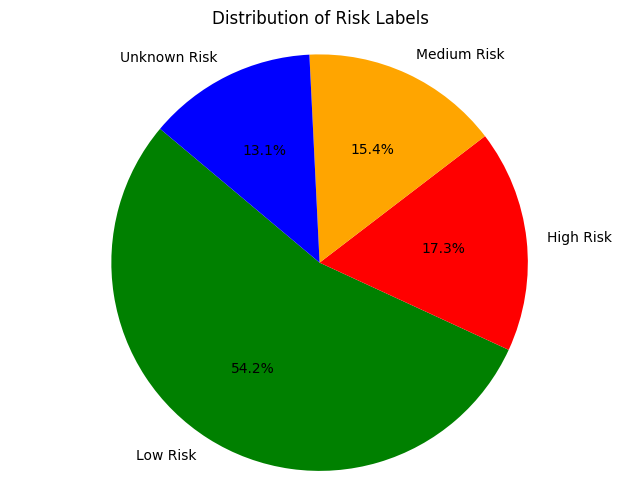

In [21]:
import matplotlib.pyplot as plt

risk_label_counts = df['Risk_Label'].value_counts()

risk_label_colors = {'High Risk': 'red', 'Medium Risk': 'orange', 'Low Risk': 'green', 'Unknown Risk': 'blue'}

plt.figure(figsize=(8, 6))
plt.pie(risk_label_counts, labels=risk_label_counts.index, autopct='%1.1f%%', startangle=140, colors=[risk_label_colors[label] for label in risk_label_counts.index])
plt.title('Distribution of Risk Labels')
plt.axis('equal')
plt.show()

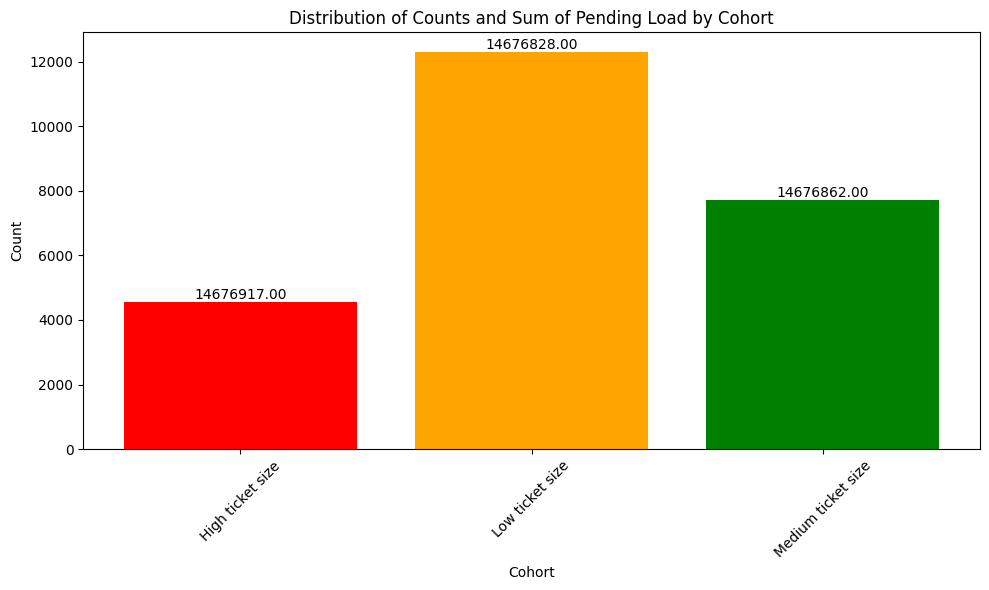

In [22]:
cohort_groups = df.groupby('cohort')
cohort_sums = cohort_groups['Amount Pending'].sum()
cohort_counts = cohort_groups.size()

cohort_colors = {'High ticket size': 'red', 'Medium ticket size': 'orange', 'Low ticket size': 'green'}

plt.figure(figsize=(10, 6))

bars1 = plt.bar(cohort_sums.index, cohort_counts.values, color=cohort_colors.values() if cohort_colors else None, label='Counts')

for bar, label, value in zip(bars1, cohort_sums.index, cohort_sums.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Cohort')
plt.ylabel('Count')
plt.title('Distribution of Counts and Sum of Pending Load by Cohort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

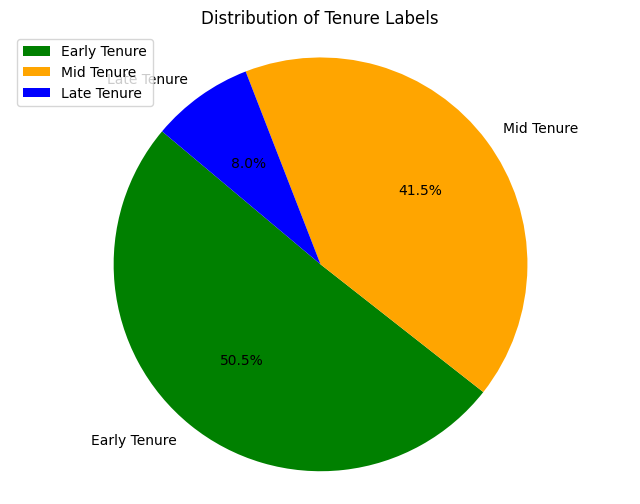

In [23]:
tenure_label_counts = df['Tenure_Label'].value_counts()

tenure_label_colors = {'Early Tenure': 'green', 'Mid Tenure': 'orange', 'Late Tenure':'blue'}

plt.figure(figsize=(8, 6))
plt.pie(tenure_label_counts, labels=tenure_label_counts.index, autopct='%1.1f%%', startangle=140, colors=tenure_label_colors.values() if tenure_label_colors else None)
plt.title('Distribution of Tenure Labels')
plt.axis('equal')
plt.legend(tenure_label_counts.index, loc="best")
plt.show()

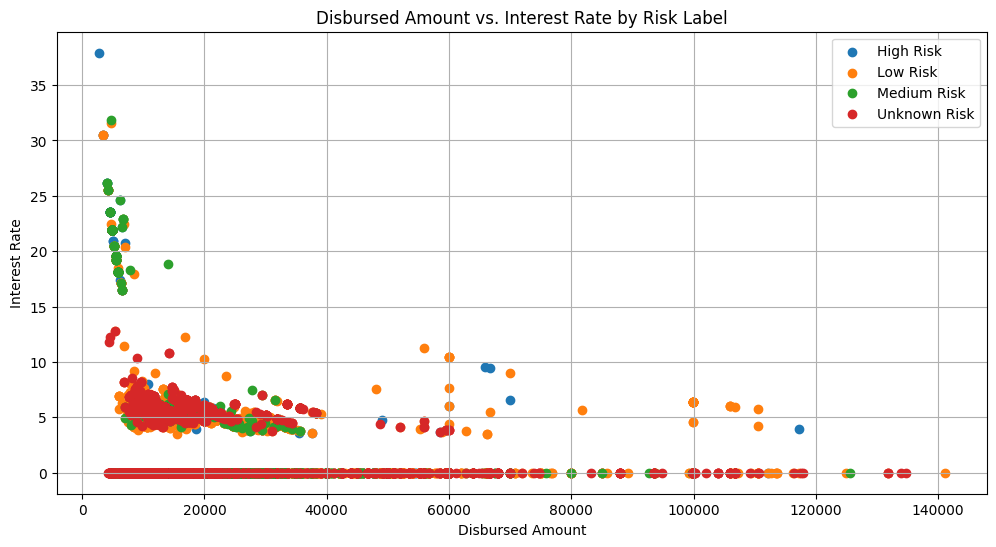

In [24]:

plt.figure(figsize=(12, 6))
for risk_label, group in df.groupby('Risk_Label'):
    plt.scatter(group['Disbursed Amount'], group['Interest Rate'], label=risk_label)
plt.title('Disbursed Amount vs. Interest Rate by Risk Label')
plt.xlabel('Disbursed Amount')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

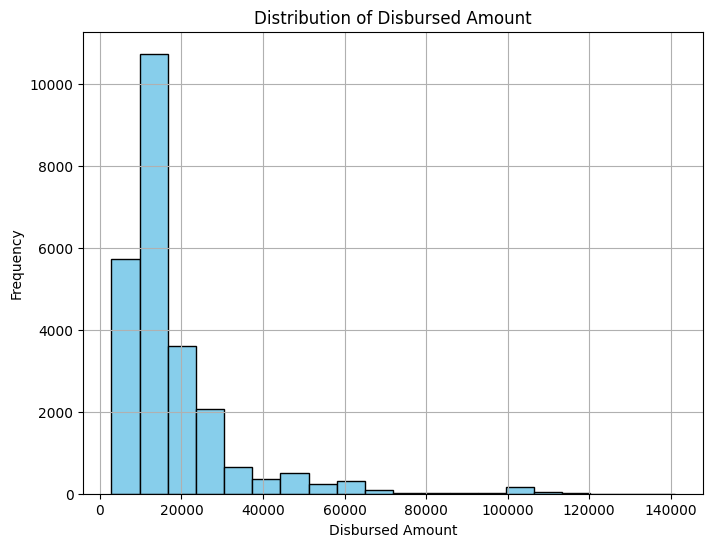

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df['Disbursed Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Disbursed Amount')
plt.xlabel('Disbursed Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

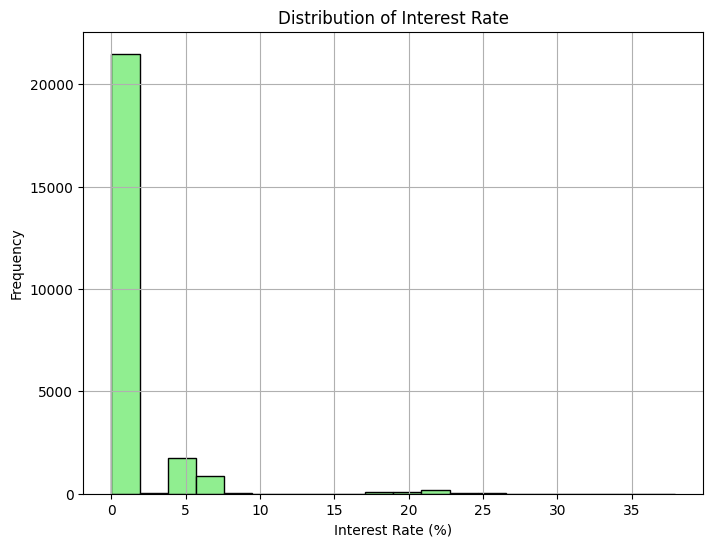

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df['Interest Rate'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

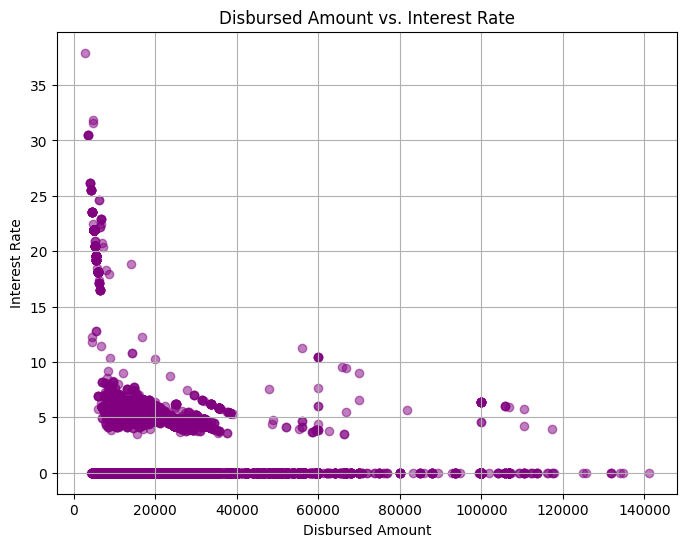

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Disbursed Amount'], df['Interest Rate'], alpha=0.5, color='purple')
plt.title('Disbursed Amount vs. Interest Rate')
plt.xlabel('Disbursed Amount')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()